# Spam Detection 

Library Import

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
from nltk import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Load Dataset

In [148]:
v1_field = "v1"
v2_field = "v2"

In [149]:
dataset_name = "spam.csv"
spam_df = pd.read_csv(dataset_name, encoding = "ISO-8859-1")
spam_df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1, inplace = True)
spam_df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Data Visualization

Word Cloud

In [150]:
def visualize_word_cloud(documents, title, width, height):
    word_cloud = WordCloud(width = width, height = height, random_state = 100)
    text_from_all_documents = " ".join(documents)
    word_cloud.generate(text_from_all_documents)

    plt.title(title)
    plt.axis("off")
    plt.imshow(word_cloud)
    plt.show()

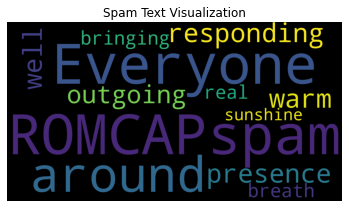

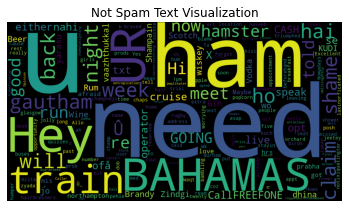

In [151]:
visualize_word_cloud(spam_df[v2_field].loc[spam_df[v2_field].str.contains("spam")], "Spam Text Visualization", 1500, 800)
visualize_word_cloud(spam_df[v2_field].loc[spam_df[v2_field].str.contains("ham")], "Not Spam Text Visualization", 1500, 800)

Label Distribution

<AxesSubplot:xlabel='v1', ylabel='Count'>

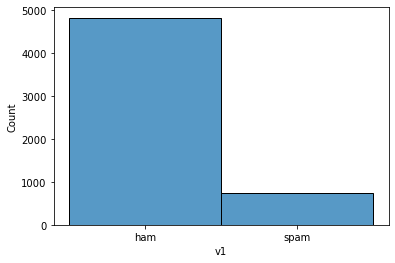

In [152]:
sns.histplot(spam_df[v1_field])

## Data Preprocessing

In [153]:
sms_texts = spam_df[v2_field]
label = spam_df[v1_field]

Remove All Punctuations

In [154]:
def get_removed_duplicated_space_in_string(my_string):
    return " ".join(my_string.split())

def get_erased_punctuations(text):
    list_of_punctuations = string.punctuation + '"‘'
    final_text = text
    
    for punc in list_of_punctuations:
        final_text = final_text.replace(punc, " ")
    
    final_text = get_removed_duplicated_space_in_string(final_text)
    
    return final_text

sms_texts_no_punc = [get_erased_punctuations(sms_text) for sms_text in sms_texts]
sms_texts_no_punc[:3]

['Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat',
 'Ok lar Joking wif u oni',
 'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry question std txt rate T C s apply 08452810075over18 s']

Lowercase All Letters

In [155]:
def lowercase_letters(sentence):
    return sentence.lower()

sms_texts_lowercase = edgar_alian_poe_poem_lower_case = list(map(lowercase_letters, sms_texts_no_punc))
sms_texts_lowercase[:5]

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s',
 'u dun say so early hor u c already then say',
 'nah i don t think he goes to usf he lives around here though']

Remove all digits

In [156]:
def erase_all_digits_from_sentence(sentence):
    digits = string.digits
    table = str.maketrans('', '', digits)
    new_string = sentence.translate(table)
    return new_string

sms_texts_erased_digits = [erase_all_digits_from_sentence(sentence) for sentence in sms_texts_lowercase]
sms_texts_erased_digits[:100]

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry question std txt rate t c s apply over s',
 'u dun say so early hor u c already then say',
 'nah i don t think he goes to usf he lives around here though',
 'freemsg hey there darling it s been  week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send å£  to rcv',
 'even my brother is not like to speak with me they treat me like aids patent',
 'as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press  to copy your friends callertune',
 'winner as a valued network customer you have been selected to receivea å£ prize reward to claim call  claim code kl valid  hours only',
 'had your mobile  months or more u r entitled to update to the latest colour mobiles with camera

Re-apply the data into dataframe

In [157]:
applied_preprocessing_spam_df = spam_df.copy()
applied_preprocessing_spam_df[v2_field] = sms_texts_erased_digits
applied_preprocessing_spam_df

,v1,v2
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...
...,...,...
5567,spam,this is the nd time we have tried contact u u...
5568,ham,will ì b going to esplanade fr home
5569,ham,pity was in mood for that so any other suggest...
5570,ham,the guy did some bitching but i acted like i d...


In [158]:
applied_preprocessing_spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Train Test Split

In [172]:
x_train, x_test, y_train, y_test = train_test_split(
    applied_preprocessing_spam_df[v2_field], 
    applied_preprocessing_spam_df[v1_field], 
    test_size = 0.15,
    random_state = 100
)

x_train = x_train.sort_index()
x_test = x_test.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()

print(x_train)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in  a wkly comp to win fa cup final...
3             u dun say so early hor u c already then say
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5566    reminder from o to get   pounds free call cred...
5568                  will ì b going to esplanade fr home
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: v2, Length: 4736, dtype: object
(4736,)
(836,)
(4736,)
(836,)


Tf Idf Vectorizer using SKLearn

See TF-IDF-From-Scratch to see the manual implementation of Standard TF-IDF. Since this colab is only focused on naive bayes, we're going to use TFIdfVectorizer from Sklearn

In [173]:
count_vectorizer = CountVectorizer()
train_vector_components = count_vectorizer.fit_transform(x_train)
test_vector_components = count_vectorizer.transform(x_test)
features = count_vectorizer.get_feature_names_out()

# print(x_train.sort_index())
# print(y_train.sort_index())

print(f"{x_train.index.min()} {x_train.index.max()}")
print(f"{y_train.index.min()} {y_train.index.max()}")

print(train_vector_components.shape)
print(features[:100])
print(features.shape)

0 5571
0 5571
(4736, 7236)
['aah' 'aaniye' 'aaooooright' 'aathi' 'ab' 'abbey' 'abdomen' 'abeg' 'abel'
 'aberdeen' 'abi' 'ability' 'abiola' 'abj' 'able' 'abnormally' 'about'
 'aboutas' 'above' 'abroad' 'absence' 'absolutly' 'abstract' 'abt' 'abta'
 'aburo' 'abuse' 'abusers' 'ac' 'academic' 'acc' 'accent' 'accenture'
 'accept' 'access' 'accidant' 'accident' 'accidentally' 'accommodation'
 'accommodationvouchers' 'accomodate' 'accomodations' 'accordin'
 'accordingly' 'account' 'accounting' 'accounts' 'accumulation' 'achan'
 'ache' 'achieve' 'acid' 'aclpm' 'acnt' 'aco' 'across' 'acted' 'actin'
 'action' 'activ' 'activate' 'active' 'activities' 'actor' 'actual'
 'actually' 'ad' 'ada' 'adam' 'add' 'addamsfa' 'added' 'addicted' 'addie'
 'adding' 'address' 'adds' 'adewale' 'admin' 'administrator' 'admirer'
 'admission' 'admit' 'adore' 'adoring' 'adp' 'adress' 'adrian' 'ads'
 'adsense' 'adult' 'adults' 'advance' 'adventure' 'adventuring' 'advice'
 'advise' 'advising' 'advisors' 'ae']
(7236,)


Perform Label Encoding

In [174]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

## Data Modelling

In [176]:
def get_vector_components_with_targets_vector(vector_components, feature_names, targets):
    copy_vector_components = vector_components.copy()
    copy_feature_names = feature_names.copy()
    copy_targets = targets.copy()

    vector_component_df = pd.DataFrame.sparse.from_spmatrix(copy_vector_components)
    vector_component_df.columns = copy_feature_names

    copy_targets = copy_targets.reset_index(drop = True)
    # print(copy_targets.index.min())
    # print(copy_targets.index.max())
    # print(vector_component_df.index.min())
    # print(vector_component_df.index.max())
    # vector_component_df = pd.concat([vector_component_df, targets], axis = 0)
    vector_component_df["target"] = copy_targets
    return vector_component_df

print(y_train.shape)
print(train_vector_components[train_vector_components > 0].shape)

vector_component_with_target = get_vector_components_with_targets_vector(train_vector_components, features, y_train)
vector_component_with_target

(4736,)
(1, 61377)


C:\Users\user\AppData\Local\Temp\ipykernel_23496\2787641090.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  vector_component_df["target"] = copy_targets


,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,aberdeen,...,ì¼,ìï,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
4732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
4733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
4734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham


Naive Bayes Modelling. In this case, we're going to implement Naive Bayes Algorithm

In [187]:
class MultinomialNaiveBayes():
    def __init__(self):
        self.vector_components = None
        self.classes = None
        self.classes_proba = None
        self.feature_given_target_proba = None
    
    def _calculate_target_given_features_proba(self):
        # Formula Example:
        # P(BMI, Age | Severe) P (severe) 
        # ----------------------------------------------------------
        # P(BMI, Age | severe) P (severe) + P(BMI, Age | mild) P(mild)
        # Results: P (severe | BMI)
        pass
    
    def _calculate_per_feature_proba(self):
        # Probability of getting a target value.
        # Example: P(severe)
        unique_classes, number_of_occurences = np.unique(self.classes, return_counts = True)
        self.classes_proba = number_of_occurences / self.classes.shape[0]

        print(unique_classes)
        print(self.classes_proba)
        
    def _calculate_feature_given_target_proba(self):
        # Calculate the number of all features per classes.
        # This is the naive feature.
        # Naive feature, that assuming all features are independent

        # Example:       Severe       Mild
        #        Well      3            5
        #        Good      0            10
        #        Done      4            1
        #   Total Class    7            16
        # Probability:
        # P (Well | Severe) = 3 / 7
        # P (Good | Severe) = 0 / 7
        # P (Well | Mild) = 5 / 16
        # P (Good | Mild) = 10 / 16
        # And so on.
        # Used for finding P(Well, Good, Done | Mild) and P (Well, Good, Done | Severe)
        # e.g. P(BMI, Age | Y) = P(BMI | Y) P (Age | Y)
        number_of_rows = self.vector_components.shape[0]
        print(number_of_rows)
        # for i in range(self.vector_components):


        pass

    def _determine_argmax(self):
        # Determine the best values from all probabilities.
        # The value with the highest probability of a class is the chosen one.
        return np.argmax(self.classes_proba)


    def fit(self, vector_components, classes):
        self.vector_components = vector_components
        self.classes = classes

        # Core functions of naive bayes

        self._calculate_per_feature_proba()
        self._calculate_
        print(vector_components)
        print(classes)
        # print(vector_components.shape)
        # print(classes.shape)
        

multinomial_naive_bayes = MultinomialNaiveBayes()
multinomial_naive_bayes.fit(train_vector_components, y_train_encoded)

[0 1]
[0.86549831 0.13450169]
  (0, 209)	1
  (0, 430)	1
  (0, 827)	1
  (0, 829)	1
  (0, 1106)	1
  (0, 1361)	1
  (0, 2497)	1
  (0, 2538)	1
  (0, 2574)	1
  (0, 2998)	1
  (0, 3241)	1
  (0, 3355)	1
  (0, 4333)	1
  (0, 4688)	1
  (0, 6273)	1
  (0, 6634)	1
  (0, 6841)	1
  (0, 7055)	1
  (1, 3210)	1
  (1, 3388)	1
  (1, 4305)	1
  (1, 4329)	1
  (1, 6962)	1
  (2, 293)	1
  (2, 1211)	1
  :	:
  (4734, 852)	1
  (4734, 861)	1
  (4734, 1613)	1
  (4734, 1888)	1
  (4734, 2275)	1
  (4734, 2318)	1
  (4734, 2422)	1
  (4734, 2626)	1
  (4734, 2712)	1
  (4734, 2998)	1
  (4734, 3065)	1
  (4734, 3117)	1
  (4734, 3487)	1
  (4734, 4151)	1
  (4734, 5720)	1
  (4734, 5729)	1
  (4734, 6257)	1
  (4734, 6382)	1
  (4734, 6664)	1
  (4734, 6886)	1
  (4735, 3124)	2
  (4735, 4072)	1
  (4735, 5223)	1
  (4735, 6382)	1
  (4735, 6503)	1
[0 0 1 ... 0 0 0]


Compare with SKLearn Model

In [ ]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(train_vector_components, y_train)
print(multinomial_nb.predict_proba(test_vector_components))

[[1.00000000e+00 1.55914563e-10]
 [2.23449842e-08 9.99999978e-01]
 [9.99816434e-01 1.83566095e-04]
 ...
 [8.12584183e-01 1.87415817e-01]
 [9.99917190e-01 8.28103374e-05]
 [6.80606497e-14 1.00000000e+00]]
